In [97]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [148]:
#model_id = 'Full_model'
model_id = "Reduced_model"
x_labels = pd.read_csv(model_id+'_x_names.csv').x.to_list()
chains   = pd.read_csv(f'{model_id}_chains.csv')
summ     = pd.read_csv(model_id+'_summary.csv') 
df       = pd.read_csv('processed_data_3.csv')
df       = df[df['iso_code'] != 'OWID_WRL']

<IPython.core.display.Javascript object>


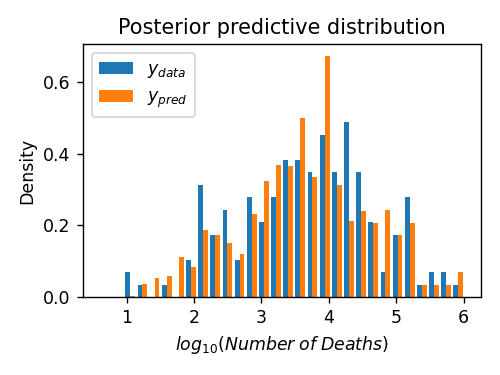

In [284]:
yreps = [chains[col].values for col in chains.columns if 'y_rep' in col]
Ypred = np.log10(np.concatenate(yreps))
Y = np.log10(df['new_deaths'][df['new_deaths']>0])

plt.figure(figsize=(4,3))
plt.hist([Y,Ypred],density=True,bins=30,label=['$y_{data}$','$y_{pred}$'])
plt.legend(loc=2)
plt.xlabel('$log_{10}(Number \; of \; Deaths)$')
plt.ylabel('Density')
plt.title('Posterior predictive distribution')
plt.tight_layout()
plt.savefig('posterior_predictive_check_model_'+model_id+'.png',dpi=120)

In [264]:
yreps_idh = []
for i in range(1,4):
    yrep_cols = [col for col in chains.columns if 'y_rep' in col]
    yreps = chains[yrep_cols].T.reset_index(drop=True)
    cond = df['group_idh'] == i
    yrep_idh = yreps.loc[cond.values].values
    yrep_idh = np.matrix.flatten(yrep_idh)
    yreps_idh.append(np.log10(yrep_idh[yrep_idh>0]))


<IPython.core.display.Javascript object>


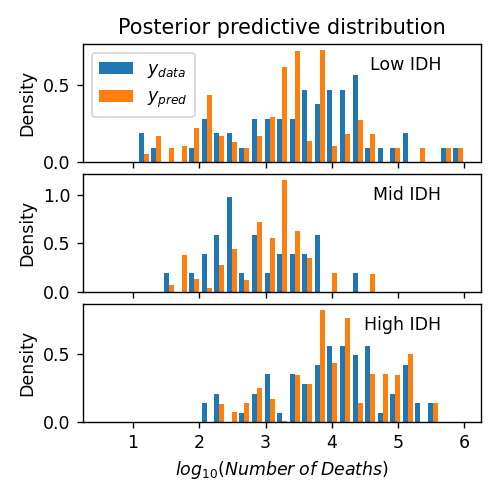

In [285]:
Y = np.log10(df['new_deaths'][df['new_deaths']>0])
group_labels= ['Low IDH','Mid IDH','High IDH']
fig,ax= plt.subplots(3,1,figsize=(4,4),sharex=True)
for i in range(3):
    Ygroup = Y[df['group_idh'] == i+1]
    ax[i].hist([Ygroup,yreps_idh[i]],density=True,
               bins=np.linspace(0.5,6,30),
                label=['$y_{data}$','$y_{pred}$'])
    ax[i].text(0.9,0.9,group_labels[i],
               transform=ax[i].transAxes,
               va = 'top', ha= 'right')
ax[0].legend(loc=2)
plt.xlabel('$log_{10}(Number \; of \; Deaths)$')
for x in ax: x.set_ylabel('Density')
ax[0].set_title('Posterior predictive distribution')
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('posterior_predictive_group_check_model_'+model_id+'.png',dpi=120)

<IPython.core.display.Javascript object>


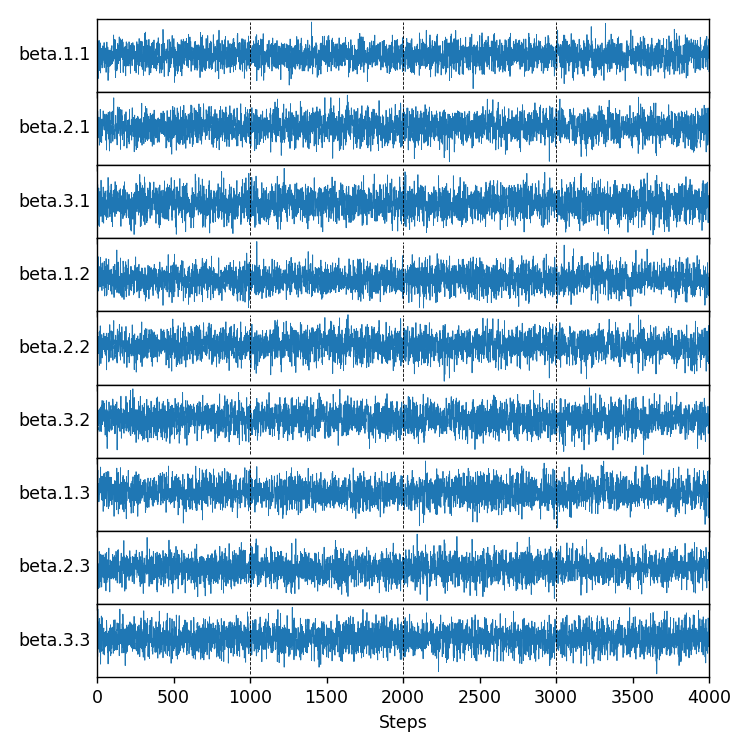

In [192]:
beta_n = len(x_labels)*3

fig,axs = plt.subplots(beta_n,1,figsize=(6,6),sharex=True)
for i,c in enumerate(chains.columns[:beta_n]):
    axs[i].plot(chains[c],label =c,lw=0.5)
    for j in range(1,4):
        axs[i].plot(np.array([1e3]*2)*j,[min(chains[c]),max(chains[c])],
                   lw=0.5,ls='--',color='k')
    axs[i].text(-0.01,0.5,c,transform=axs[i].transAxes,
                va='center',ha='right')
    axs[i].set_yticks([])
axs[-1].set_xlabel('Steps')
axs[-1].set_xlim(0,4000)
plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('chains_beta_values_model_'+model_id+'.png',dpi=120)

<IPython.core.display.Javascript object>


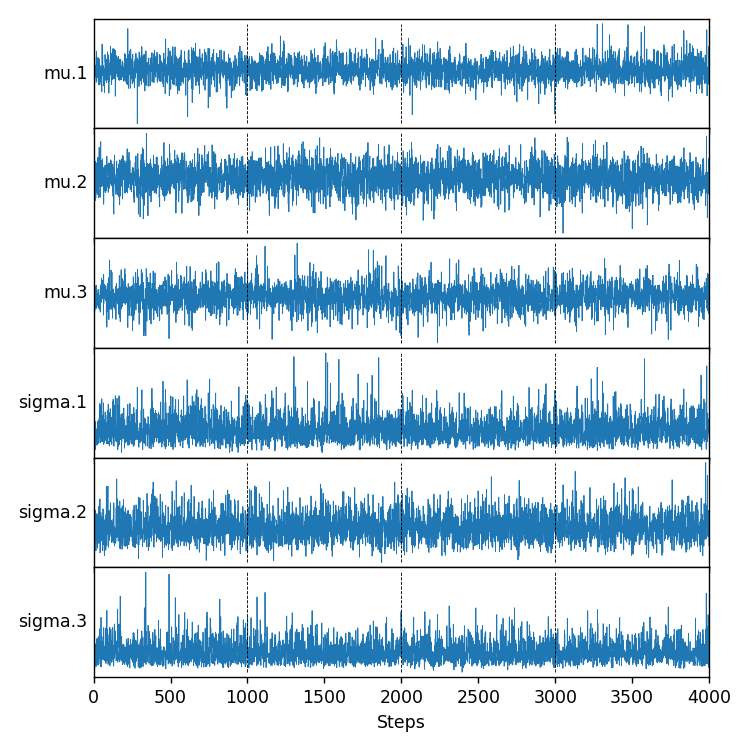

In [194]:
fig,axs = plt.subplots(int(beta_n*2/3),1,figsize=(6,6),sharex=True)
for i,c in enumerate(chains.columns[beta_n:beta_n+int(beta_n*2/3)]):
    axs[i].plot(chains[c],label =c,lw=0.5)
    for j in range(1,4):
        axs[i].plot(np.array([1e3]*2)*j,[min(chains[c]),max(chains[c])],
                   lw=0.5,ls='--',color='k')
    axs[i].text(-0.01,0.5,c,transform=axs[i].transAxes,
                va='center',ha='right')
    axs[i].set_yticks([])
axs[-1].set_xlabel('Steps')
axs[-1].set_xlim(0,4000)
plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('chains_hyper_values_model_'+model_id+'.png',dpi=120)

In [195]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-6.806057e+00,0.009339,0.446979,-7.657513e+00,-7.085643e+00,-6.812610e+00,-6.540862e+00,-5.893631e+00,2290.591656,1.000423
1,mu[2],6.054200e+00,0.031516,1.961388,2.051946e+00,4.734049e+00,6.090349e+00,7.383957e+00,9.736883e+00,3873.237571,1.000526
2,mu[3],7.822650e-02,0.005795,0.291058,-5.397519e-01,-9.009888e-02,8.553861e-02,2.443922e-01,6.835240e-01,2522.899961,1.001165
3,sigma[1],7.439894e-01,0.004771,0.224408,4.219327e-01,5.833797e-01,7.068782e-01,8.654491e-01,1.264784e+00,2212.448435,1.002573
4,sigma[2],3.676826e+00,0.007587,0.489109,2.844264e+00,3.329849e+00,3.632679e+00,3.975221e+00,4.764856e+00,4155.546418,0.999287
...,...,...,...,...,...,...,...,...,...,...,...
171,y_rep[157],2.057148e+03,0.778201,47.661705,1.964000e+03,2.025000e+03,2.057000e+03,2.088000e+03,2.154000e+03,3751.069995,1.000254
172,y_rep[158],7.203766e+03,1.381294,89.902790,7.026975e+03,7.143000e+03,7.205000e+03,7.262000e+03,7.381000e+03,4236.179727,0.999873
173,y_rep[159],1.998259e+03,0.719358,45.788229,1.909975e+03,1.968000e+03,1.998000e+03,2.029000e+03,2.089000e+03,4051.512964,0.999590
174,y_rep[160],1.168879e+03,0.571882,35.085388,1.098975e+03,1.146000e+03,1.168500e+03,1.192000e+03,1.238000e+03,3763.919089,1.000001


<IPython.core.display.Javascript object>


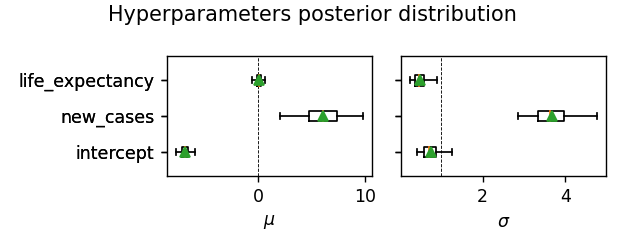

In [289]:
xlen = len(x_labels)
pos = np.linspace(0,xlen,xlen)

mu_vals = []
nx = len(x_labels)
for i in range(0,xlen):
    bxpval = dict(label  = x_labels[i],
                  mean   = summ['mean'][i],
                  whislo = summ['2.5%'][i],
                  q1     = summ['25%'][i],
                  med    = summ['50%'][i],
                  q3     = summ['75%'][i], 
                  whishi = summ['97.5%'][i],
                   )
    mu_vals.append(bxpval)
sig_vals = []
for i in range(xlen,xlen*2):
    bxpval = dict(label  = x_labels[i-len(x_labels)],
                  mean   = summ['mean'][i],
                  whislo = summ['2.5%'][i],
                  q1     = summ['25%'][i],
                  med    = summ['50%'][i],
                  q3     = summ['75%'][i], 
                  whishi = summ['97.5%'][i],
                   )
    sig_vals.append(bxpval)

fig,axs = plt.subplots(1,2,figsize=(5,2),sharey=True)
axs[0].bxp(mu_vals,positions=pos, showmeans=True, showfliers=False,vert=False)
axs[0].set_xlabel('$\mu$')
axs[0].plot([0,0],[min(pos)-1,max(pos)+1],lw=0.5,color='k',linestyle='--')
axs[1].bxp(sig_vals,positions=pos, showmeans=True, showfliers=False,vert=False)
axs[1].plot([1,1],[min(pos)-1,max(pos)+1],lw=0.5,color='k',linestyle='--')
axs[1].set_xlabel('$\sigma$')
for ax in axs: ax.set_ylim(min(pos)-1,max(pos)+1)
fig.suptitle('Hyperparameters posterior distribution')
plt.tight_layout()
plt.savefig('hyperparameters_model_'+model_id+'.png',dpi=120)

In [197]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-6.806057e+00,0.009339,0.446979,-7.657513e+00,-7.085643e+00,-6.812610e+00,-6.540862e+00,-5.893631e+00,2290.591656,1.000423
1,mu[2],6.054200e+00,0.031516,1.961388,2.051946e+00,4.734049e+00,6.090349e+00,7.383957e+00,9.736883e+00,3873.237571,1.000526
2,mu[3],7.822650e-02,0.005795,0.291058,-5.397519e-01,-9.009888e-02,8.553861e-02,2.443922e-01,6.835240e-01,2522.899961,1.001165
3,sigma[1],7.439894e-01,0.004771,0.224408,4.219327e-01,5.833797e-01,7.068782e-01,8.654491e-01,1.264784e+00,2212.448435,1.002573
4,sigma[2],3.676826e+00,0.007587,0.489109,2.844264e+00,3.329849e+00,3.632679e+00,3.975221e+00,4.764856e+00,4155.546418,0.999287
...,...,...,...,...,...,...,...,...,...,...,...
171,y_rep[157],2.057148e+03,0.778201,47.661705,1.964000e+03,2.025000e+03,2.057000e+03,2.088000e+03,2.154000e+03,3751.069995,1.000254
172,y_rep[158],7.203766e+03,1.381294,89.902790,7.026975e+03,7.143000e+03,7.205000e+03,7.262000e+03,7.381000e+03,4236.179727,0.999873
173,y_rep[159],1.998259e+03,0.719358,45.788229,1.909975e+03,1.968000e+03,1.998000e+03,2.029000e+03,2.089000e+03,4051.512964,0.999590
174,y_rep[160],1.168879e+03,0.571882,35.085388,1.098975e+03,1.146000e+03,1.168500e+03,1.192000e+03,1.238000e+03,3763.919089,1.000001


In [199]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-6.806057e+00,0.009339,0.446979,-7.657513e+00,-7.085643e+00,-6.812610e+00,-6.540862e+00,-5.893631e+00,2290.591656,1.000423
1,mu[2],6.054200e+00,0.031516,1.961388,2.051946e+00,4.734049e+00,6.090349e+00,7.383957e+00,9.736883e+00,3873.237571,1.000526
2,mu[3],7.822650e-02,0.005795,0.291058,-5.397519e-01,-9.009888e-02,8.553861e-02,2.443922e-01,6.835240e-01,2522.899961,1.001165
3,sigma[1],7.439894e-01,0.004771,0.224408,4.219327e-01,5.833797e-01,7.068782e-01,8.654491e-01,1.264784e+00,2212.448435,1.002573
4,sigma[2],3.676826e+00,0.007587,0.489109,2.844264e+00,3.329849e+00,3.632679e+00,3.975221e+00,4.764856e+00,4155.546418,0.999287
...,...,...,...,...,...,...,...,...,...,...,...
171,y_rep[157],2.057148e+03,0.778201,47.661705,1.964000e+03,2.025000e+03,2.057000e+03,2.088000e+03,2.154000e+03,3751.069995,1.000254
172,y_rep[158],7.203766e+03,1.381294,89.902790,7.026975e+03,7.143000e+03,7.205000e+03,7.262000e+03,7.381000e+03,4236.179727,0.999873
173,y_rep[159],1.998259e+03,0.719358,45.788229,1.909975e+03,1.968000e+03,1.998000e+03,2.029000e+03,2.089000e+03,4051.512964,0.999590
174,y_rep[160],1.168879e+03,0.571882,35.085388,1.098975e+03,1.146000e+03,1.168500e+03,1.192000e+03,1.238000e+03,3763.919089,1.000001


<IPython.core.display.Javascript object>


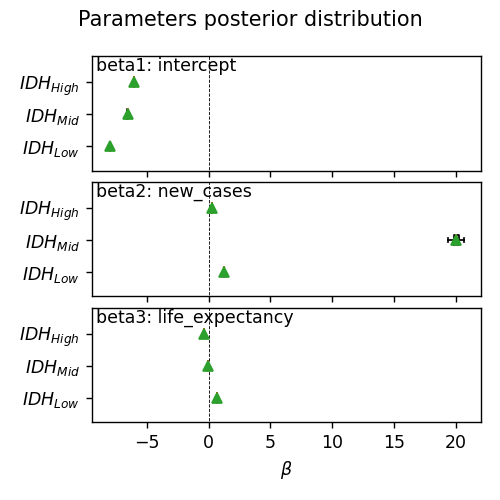

In [290]:
group_labs = ['$IDH_{Low}$','$IDH_{Mid}$','$IDH_{High}$']

idh_group_is = np.array([xlen*2,xlen*3,xlen*4])

bsummarys = []
for j in range(xlen):
    bsummary = []
    for ii,i in enumerate(idh_group_is + j):
        b = dict(mean   = summ['mean'][i],
                 whislo = summ['2.5%'][i],
                 q1     = summ['25%'][i],
                 med    = summ['50%'][i],
                 q3     = summ['75%'][i], 
                 whishi = summ['97.5%'][i])
        bsummary.append(b)
    bsummarys.append(bsummary)
pos = np.linspace(0,2,3)

fig,axs = plt.subplots(3,1,
                       figsize=(4,4),sharey=True,sharex=True)
fig.suptitle('Parameters posterior distribution')
for i,(bsummary,ax,lab) in enumerate(zip(bsummarys,axs.ravel(),x_labels)):
    ax.bxp(bsummary,pos, showmeans=True, showfliers=False,vert=False)
    ax.plot([0,0],[-1,3],lw=0.5,color='k',linestyle='--')
    ax.set_yticks(pos)
    ax.set_yticklabels(group_labs)
    beta_val = summ['Unnamed: 0'][xlen*2+i][-2]
    lab =  "beta{}".format(beta_val) + ': ' + lab
    ax.text(0.01,0.99,lab,va='top',ha='left',transform=ax.transAxes)
    ax.set_ylim(-0.75,2.8)

#axs[-1,-1].axis('off')

axs[-1].set_xlabel(r'$\beta$')
#axs[-2,1].set_xlabel(r'$\beta$')
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.1)
plt.savefig('parameters_model_'+model_id+'.png',dpi=120)

# Prior Predictive Check

In [291]:
def params_category_matrix(df,params):
    nx = int(len(params)/5) # 9 parametros
    bs = []
    g_idh = df['group_idh']
    for i in range(nx): # i =0
        b  = pd.cut(g_idh,bins=[0,1.5,2.5,3.5],
                       labels=params[np.array([0,1,2])+(3*i)], 
                       include_lowest=True)
        bs.append(b.to_numpy())
    return np.vstack(bs).T

def prior_predictive_paramater_sampling(x_cols,size=1000):
    n_params = len(x_cols)
    mu  = np.random.normal(loc=0,scale=5,size=(n_params,size))
    sig = np.random.exponential(scale=5,size=(n_params,size))
    bet = [np.random.normal(loc=u,scale=s) for u,s in zip(mu,sig) for i in range(3)]
    return np.concatenate([bet,mu,sig]).T

def gen_prediction(df,q,x_names):
    x_cols =x_names.copy()
    Y = df['new_deaths'].to_numpy(dtype=int)
    xn = len(x_cols)
    x_cols.remove('intercept')
    X = df[x_cols].to_numpy()
    X = np.hstack([np.ones((X.shape[0],1)),X])
    #print(df['population'].min(),df['population'].max())
    N = df['population'].astype(int)
    #print(N.min(),N.max())
    B = params_category_matrix(df,q)
    #print(B)
    logitarg = np.sum(X * B,axis=1) # expit argument result
    T = expit(logitarg)
    Ypred = np.random.binomial(N,T)
    return Ypred,Y,N,T

In [292]:
prior_params = prior_predictive_paramater_sampling(x_labels)
prior_params.shape

(1000, 15)

<IPython.core.display.Javascript object>


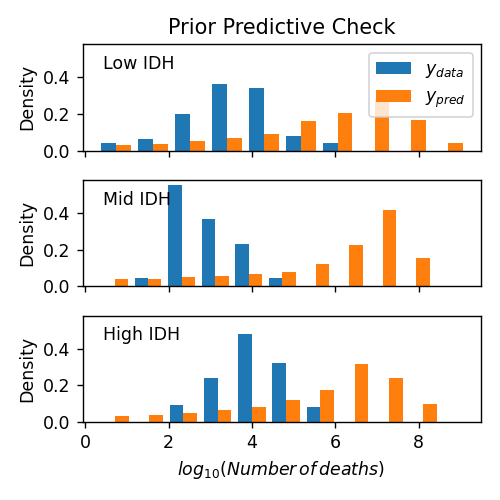

In [293]:
yls,yms,yhs = [],[],[]
for i in range(1000):
    Ypred,Y,N,T = gen_prediction(df,prior_params[i],x_labels)
    yl = Ypred[df['group_idh']==1]
    yls.append(np.log10(yl[yl>0]))
    ym = Ypred[df['group_idh']==2]
    yms.append(np.log10(ym[ym>0]))
    yh = Ypred[df['group_idh']==3]
    yhs.append(np.log10(yh[yh>0]))
Yl = np.concatenate(yls)
Ym = np.concatenate(yms)
Yh = np.concatenate(yhs)

ys = []
for i in range(1,4):
    ii = df['group_idh']==i
    Ygroup = Y[ii]
    y = np.log10(Ygroup[Ygroup>0])
    ys.append(y)

group_labels = ['Low IDH','Mid IDH','High IDH']
fig,axs = plt.subplots(3,1,figsize=(4,4),sharex=True,sharey=True)
for i,ypred in zip(range(3),[Yl,Ym,Yh]):
    axs[i].hist([ys[i],ypred[ypred>0]],label=['$y_{data}$','$y_{pred}$'],density=True)
    axs[i].text(0.05,0.9,group_labels[i],va='top',transform=axs[i].transAxes)
axs[-1].set_xlabel('$log_{10}(Number \, of \, deaths)$ ')
for x in axs: x.set_ylabel('Density')
axs[0].legend(loc=1)
axs[0].set_title('Prior Predictive Check')
fig.align_ylabels()
plt.tight_layout()
plt.savefig('prior_predictive_check_model_'+model_id+'.png',dpi=120)

<IPython.core.display.Javascript object>


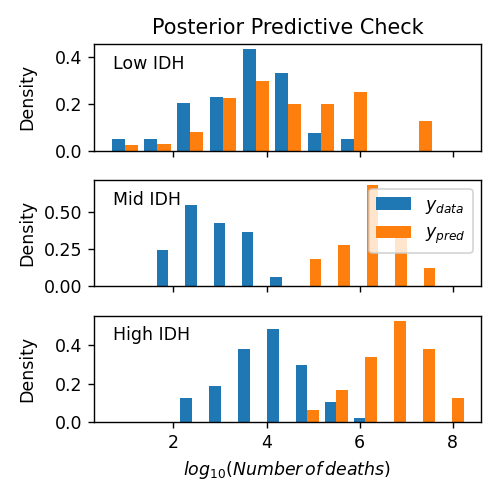

In [136]:
yls,yms,yhs = [],[],[]
for i in range(4000):
    params = chains.iloc[i].sort_index().values
    Ypred,Y,N,T = gen_prediction(df,params,x_labels)
    yl = Ypred[df['group_idh']==1]
    yls.append(np.log10(yl[yl>0]))
    ym = Ypred[df['group_idh']==2]
    yms.append(np.log10(ym[ym>0]))
    yh = Ypred[df['group_idh']==3]
    yhs.append(np.log10(yh[yh>0]))
Yl = np.concatenate(yls)
Ym = np.concatenate(yms)
Yh = np.concatenate(yhs)

ys = [] # Data y values
for i in range(1,4):
    ii = df['group_idh']==i
    Ygroup = Y[ii]
    y = np.log10(Ygroup[Ygroup>0])
    ys.append(y)

group_labels = ['Low IDH','Mid IDH','High IDH']
fig,axs = plt.subplots(3,1,figsize=(4,4),sharex=True)
for i,ypred in zip(range(3),[Yl,Ym,Yh]):
    axs[i].hist([ys[i],ypred[ypred>0]],label=['$y_{data}$','$y_{pred}$'],density=True)
    axs[i].text(0.05,0.9,group_labels[i],va='top',transform=axs[i].transAxes)
axs[-1].set_xlabel('$log_{10}(Number \, of \, deaths)$ ')
for x in axs: x.set_ylabel('Density')
axs[1].legend(loc=1)
axs[0].set_title('Posterior Predictive Check')
fig.align_ylabels()
plt.tight_layout()
#plt.savefig('posterior_predictive_check_model_'+model_id+'.png',dpi=120)